In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('D:\MLProjects\Loan Approval\loan_train.csv') 

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [7]:
#lets see skewness exists or not in this data 
df.skew()

C:\Users\Bhargav\AppData\Local\Temp/ipykernel_3144/2000028214.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Dependents           0.978647
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [8]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observation: Mean is higher in ApplicantIncome, Skewness present and by observing the difference in minimmum and maximum and inter quartile range we can conclude outliers exists.

# EDA- Univariate analysis

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

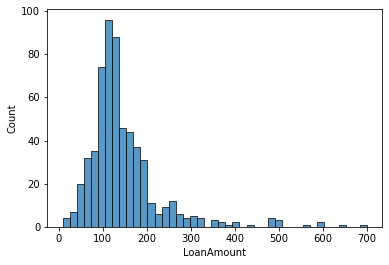

In [9]:
sns.histplot(df['LoanAmount'])

Y    422
N    192
Name: Loan_Status, dtype: int64

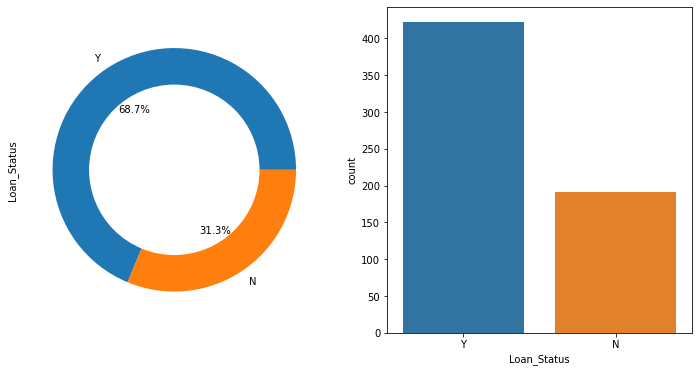

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Loan_Status',data=df)
df['Loan_Status'].value_counts()

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

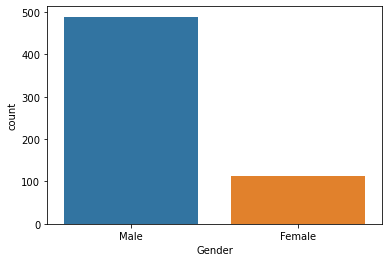

In [11]:
sns.countplot('Gender',data=df)

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

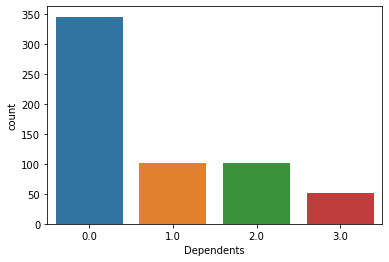

In [12]:
sns.countplot('Dependents',data=df)

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

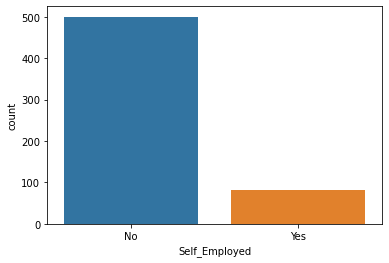

In [13]:
sns.countplot('Self_Employed',data=df)

In [14]:
df.Property_Area.value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

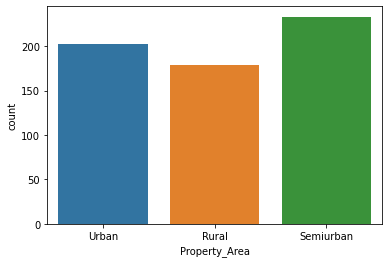

In [15]:
sns.countplot('Property_Area',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

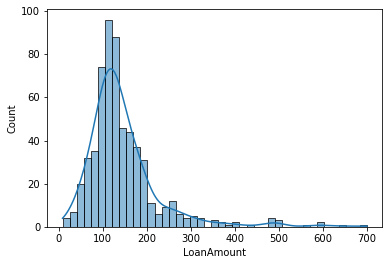

In [16]:
sns.histplot(df['LoanAmount'],kde=True)

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

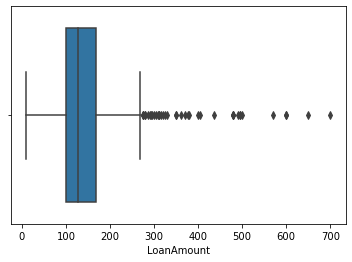

In [17]:
#lets check for outilers in loan amoount
sns.boxplot(df['LoanAmount'])

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

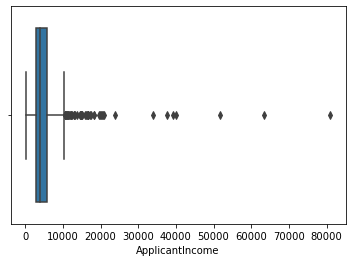

In [18]:
sns.boxplot('ApplicantIncome',data=df)

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

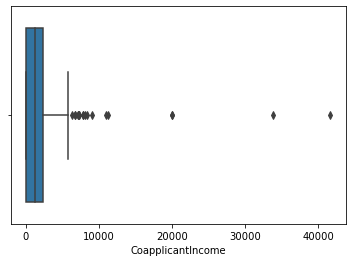

In [19]:
sns.boxplot('CoapplicantIncome',data=df)

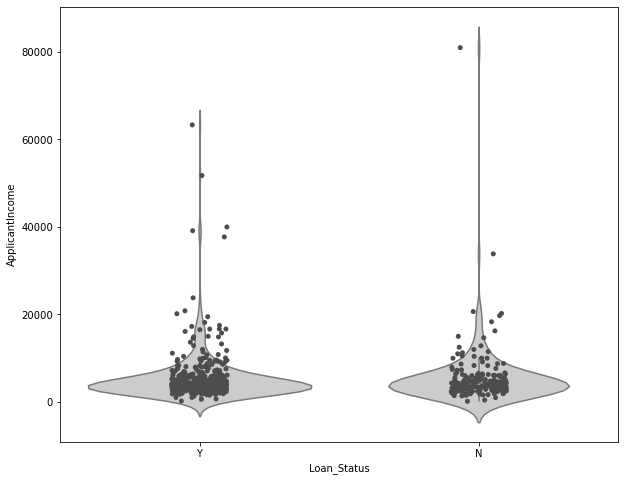

In [20]:
plt.figure(figsize=(10,8))
ax=sns.violinplot(x='Loan_Status',y='ApplicantIncome',data=df,color='.8')
ax=sns.stripplot(x='Loan_Status',y='ApplicantIncome',data=df,color=".3")

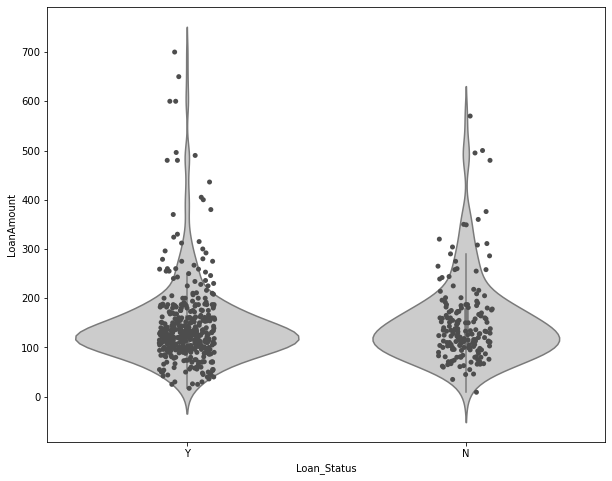

In [21]:
plt.figure(figsize=(10,8))
ax=sns.violinplot(x='Loan_Status',y='LoanAmount',data=df,color=".8")
ax=sns.stripplot(x='Loan_Status',y='LoanAmount',data=df,color=".3")

<AxesSubplot:xlabel='Education', ylabel='count'>

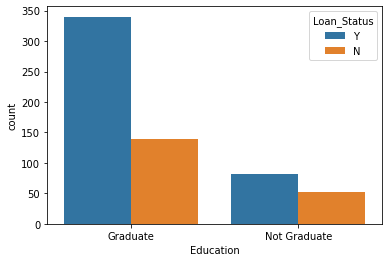

In [22]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

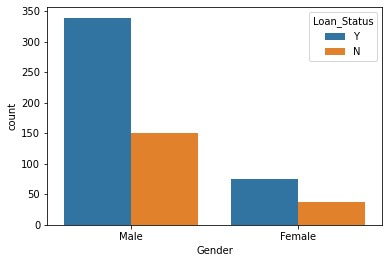

In [23]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

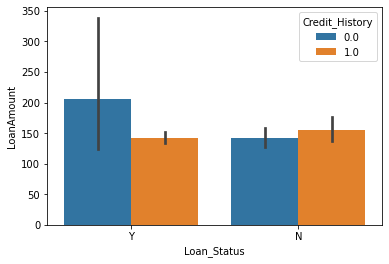

In [24]:
sns.barplot(x='Loan_Status',y='LoanAmount',hue='Credit_History',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

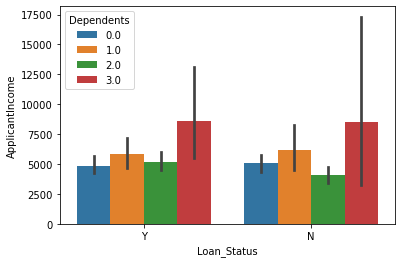

In [25]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Dependents',data=df)

Observation: Loan approval didn't much depends on dependents cause even with three dependents loan approval and rejected are almost same. 

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

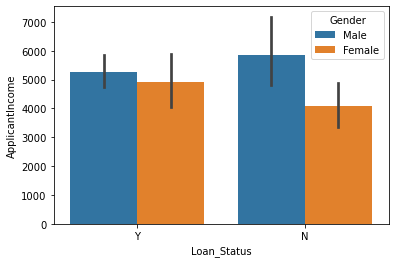

In [26]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=df)

<AxesSubplot:>

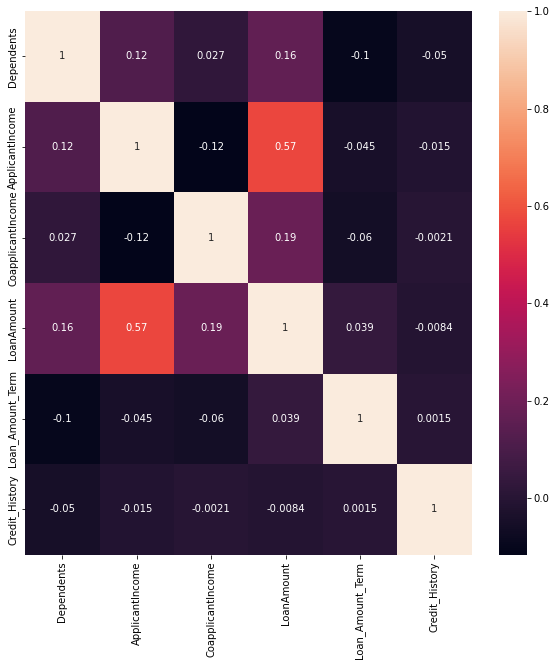

In [27]:
#LEts find the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
#two positively correlated features

# Feature Engineering

In [28]:
#dropping ID column
df.drop('Loan_ID',axis=1,inplace=True)

In [29]:
#replacing null values with Mode
#Imputing null values of categorical features with mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [30]:
#as the Loan amount forms right skewed i'm not using mode, median is preffered for skewed distributions
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [31]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [32]:
# convert categorical columns to numerical values(you can use ordinal encoding too)
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1


#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))
        
2.#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

3. #We use threshold as 3.6 because data is expensive and we already have less of data.
df=df[(z<3.6).all(axis=1)]


4.Removing skewness
for i in cont:
    print(i,df[i].skew())
    
 5.df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

6.for i in cont:
    sns.distplot(df[i])
    plt.figure()
    
 Skewness has reduced as shown in the above distribution plot.
 
7.After seperating x and y
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()


8.x,y=over.fit_resample(x,y)

9.plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()
Data is balanced now, both the category of income have 50% data each.

10.no need
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)



In [34]:
X= df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [36]:
#score=cross_val_score(model,X,y,cv=10)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [38]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred = model.predict(X_test)

In [40]:
print(accuracy_score(y_test,y_pred))

0.7886178861788617


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63        45
           1       0.77      0.96      0.85        78

    accuracy                           0.79       123
   macro avg       0.82      0.73      0.74       123
weighted avg       0.81      0.79      0.77       123



In [42]:
import pickle

In [ ]:
filename = 'classifier.pkl'
pickle.dump(model,open(filename, 'wb'))